This notebook is created for self learning purposes, Most of the things are taken from - https://github.com/seg/tutorials-2018/blob/master/1804_Conjugate_gradient_inversion/conjugate_gradient_MS.ipynb. I have added some modifications and tried the code on recent Alaska earthquake

In [1]:
import sys

import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt

print ("sys.version=", sys.version)
print ("np.__version__=", np.__version__)

sys.version= 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
np.__version__= 1.18.1


In [2]:
# NOT FOR MANUSCRIPT
A  = np.matrix([[2,3], [(6+3j),-7]])

print("matrix")
print(A)
print("\ntranspose")
print(A.T)
print("\ncomplex conjugate transpose, aka Hermitian transpose")
print(A.H)

matrix
[[ 2.+0.j  3.+0.j]
 [ 6.+3.j -7.+0.j]]

transpose
[[ 2.+0.j  6.+3.j]
 [ 3.+0.j -7.+0.j]]

complex conjugate transpose, aka Hermitian transpose
[[ 2.-0.j  6.-3.j]
 [ 3.-0.j -7.-0.j]]


In [3]:
# NOT FOR MANUSCRIPT

# Impedance, imp     VP    RHO
imp = np.ones(51) * 2550 * 2650
imp[10:15] =        2700 * 2750
imp[15:27] =        2400 * 2450
imp[27:35] =        2800 * 3000

# Compute reflectivity.
m = (imp[1:] - imp[:-1]) / (imp[1:] + imp[:-1])

C:\Users\akash\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


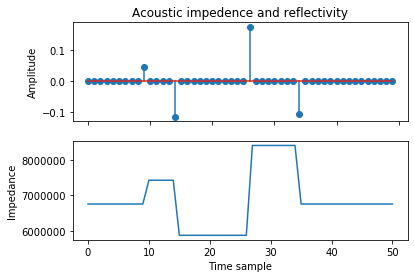

In [4]:
# NOT FOR MANUSCRIPT
fig, axs = plt.subplots(nrows=2)

ax = axs[0]
ax.set_title('Acoustic impedence and reflectivity')
ax.set_ylabel('Amplitude')
ax.set_xticklabels([])
ax.stem(m)

ax = axs[1]
ax.plot(imp)
ax.set_xlabel('Time sample')
ax.set_ylabel('Impedance')

plt.show()

In [5]:

# NOT FOR MANUSCRIPT
from scipy.signal import ricker

# Use an odd number so we get a centered peak.
wavelet = ricker(points=21, a=2)

# Normalize the wavelet amplitude to 1 so that the amplitude
# relates directly to the reflectivity.
wavelet /= np.amax(wavelet)

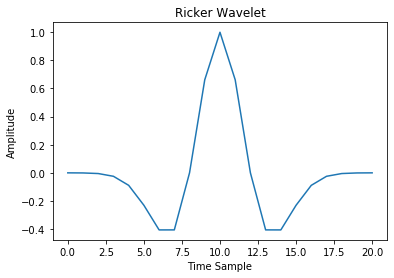

In [6]:

# NOT FOR MANUSCRIPT
fig, ax = plt.subplots()

ax.set_title('Ricker Wavelet')
ax.set_xlabel('Time Sample')
ax.set_ylabel('Amplitude')
ax.plot(wavelet)

plt.show()

In [7]:
class Operator(object):
    """A linear operator.
    """
    def __init__(self, wavelet):
        self.wavelet = wavelet

    def forward(self, v):
        """Defines the forward operator.
        """
        return np.convolve(v, self.wavelet, mode='same')
    
    def adjoint(self, v):
        """Defines the adjoint operator.
        """
        return np.correlate(v, self.wavelet, mode='same')

In [8]:
# NOT FOR MANUSCRIPT
# Dot product test.
w = np.array([1.0, -2.0, 0.5, 0, 0])
x = np.random.rand(50)
y = np.random.rand(50)

F = Operator(w)

convx = F.forward(x)
cadjy = F.adjoint(y)

print('<Fx, y>  =', np.dot(convx, y))
print('<x, F*y> =', np.dot(x, cadjy))
print('diff     =', np.dot(convx, y) - np.dot(x, cadjy))

<Fx, y>  = -6.856101677292516
<x, F*y> = -6.856101677292516
diff     = 0.0


In [9]:
F = Operator(wavelet)

In [10]:
d = F.forward(m)

C:\Users\akash\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


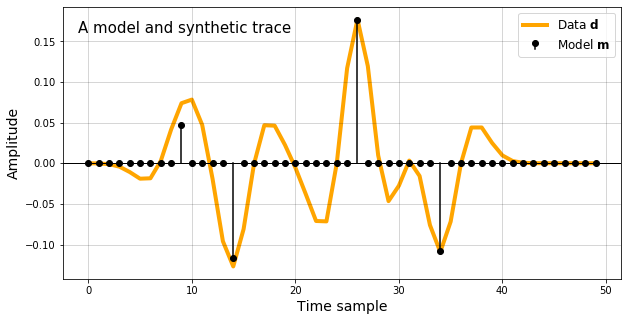

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.stem(m, label="Model $\mathbf{m}$", basefmt='none', linefmt='k', markerfmt='ko')
plt.axhline(c='k', lw=1)
ax.plot(d, color='orange', lw=4, zorder=1, label="Data $\mathbf{d}$")
ax.text(-1, 0.16, 'A model and synthetic trace', size=15)
ax.set_xlabel('Time sample', size=14)
ax.set_ylabel('Amplitude', size=14)
ax.legend(fontsize=12)
ax.grid(color='k', alpha=0.2)

plt.savefig('figure1_model_data.png', dpi=300)
plt.show()

In [12]:
n = 5

In [13]:
# NOT FOR MANUSCRIPT
# This version has the cache, which is just a convenient
# way to store the results of the iterations.
m_est = np.zeros_like(d)
r = d - F.forward(m_est)
s = np.zeros_like(d)
beta = 0

cache = [m_est]
for i in range(n):
    g = F.adjoint(r)
    if i != 0:
        beta = np.dot(g, g) / gamma
    gamma = np.dot(g, g)
    s = g + beta * s
    deltar = F.forward(s)
    alpha = np.dot(g, g) / np.dot(deltar, deltar)
    m_est = m_est + alpha * s
    r = r - alpha * deltar
    cache.append(m_est)

In [14]:
m_est = np.zeros_like(d)
r = d - F.forward(m_est)
s = np.zeros_like(d)
beta = 0

for i in range(n):
    g = F.adjoint(r)
    if i != 0:
        beta = np.dot(g, g) / gamma
    gamma = np.dot(g, g)
    s = g + beta * s
    deltar = F.forward(s)
    alpha = np.dot(g, g) / np.dot(deltar, deltar)
    m_est = m_est + alpha * s
    r = r - alpha * deltar

In [15]:

d_pred = F.forward(m_est)

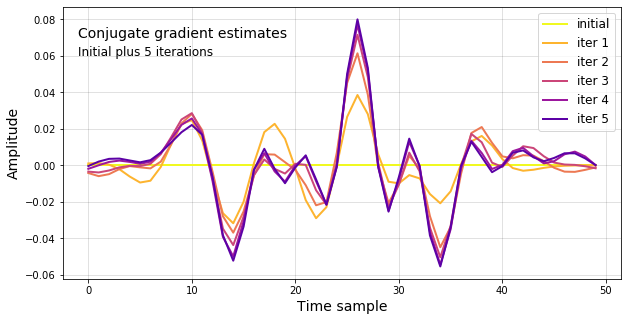

In [16]:
# NOT FOR MANUSCRIPT
fig, ax = plt.subplots(figsize=(10, 5))

#plt.stem(m, label=r'Model $\mathbf{m}$', basefmt='none', linefmt='k', markerfmt='ko')
#plt.axhline(color='k', lw=1)
idx = np.linspace(0, 1, len(cache)+1)
for c, (i, m_est) in zip(idx, enumerate(cache)):
    label = 'iter {}'.format(i) if i else "initial" 
    plt.plot(m_est, color=plt.cm.plasma_r(c), label=label, lw=2)
plt.legend(fontsize=12)
plt.grid(color='k', alpha=0.15)
ax.text(-1, 0.07, 'Conjugate gradient estimates', size=14)
ax.text(-1, 0.06, 'Initial plus {} iterations'.format(n), size=12)
ax.set_xlabel('Time sample', size=14)
ax.set_ylabel('Amplitude', size=14)

plt.savefig('figure2_cg_est_iter.png', dpi=300)
plt.show()

C:\Users\akash\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


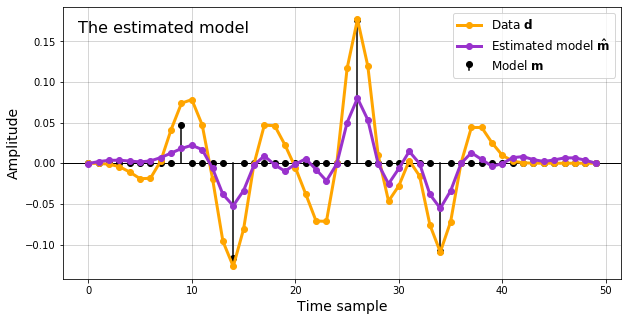

In [17]:
# NOT FOR MANUSCRIPT
fig, ax = plt.subplots(figsize=(10, 5))

plt.stem(m, label='Model $\mathbf{m}$', basefmt='none', linefmt='k', markerfmt='ko')
plt.axhline(color='k', lw=1)
ax.plot(d, 'o-', color='orange', lw=3, label='Data $\mathbf{d}$')
ax.plot(m_est, 'o-', color='darkorchid', lw=3, label='Estimated model $\mathbf{\hat{m}}$')
ax.legend(fontsize=12)
ax.set_xlabel('Time sample', size=14)
ax.set_ylabel('Amplitude', size=14)
ax.text(-1, 0.16, 'The estimated model', color='k', size=16)
ax.grid(color='k', alpha=0.2)

plt.savefig('figure3_data_model_estmodel.png', dpi=300)
plt.show()

In [19]:

# NOT FOR MANUSCRIPT

# Check the norm
difference = d - d_pred
misfit = np.linalg.norm(difference)**2
misfit

0.000731742625056066

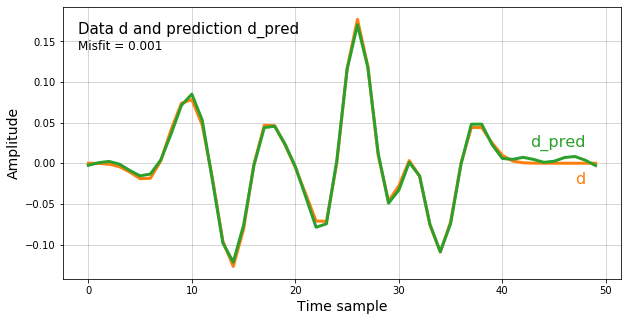

In [20]:
# NOT FOR MANUSCRIPT
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(d, label='d', color='C1', lw=3)
ax.plot(d_pred, label="d_pred", color='C2', lw=3)
ax.text(-1, 0.16, 'Data d and prediction d_pred', color='k', size=15)
ax.text(-1, 0.14, 'Misfit = {:.3f}'.format(misfit), color='k', size=12)
ax.text(48, -0.025, 'd', ha='right', color='C1', size=16)
ax.text(48, 0.02, 'd_pred', ha='right', color='C2', size=16)
ax.set_xlabel('Time sample', size=14)
ax.set_ylabel('Amplitude', size=14)
ax.grid(color='k', alpha=0.2)

plt.savefig('figure4_data_cg_pred.png', dpi=300)
plt.show()